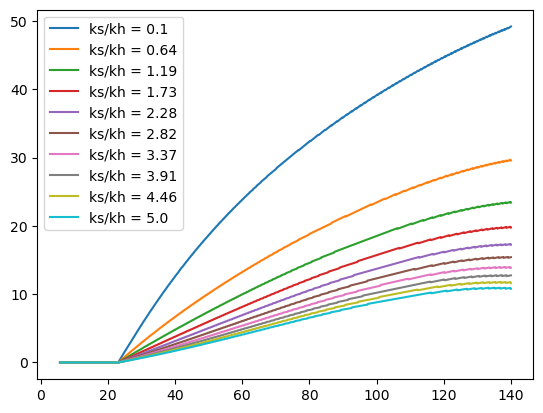

In [1]:
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
# %run "classes_ipynb.ipynb"
sys.path.insert(0, "..")
import classes2
warnings.filterwarnings('ignore')



phis,alfa,pomery,x,koefs,koefh = sp.symbols('phis,alfa,pomery,x,koefs,koefh')
a=0.1
b=0.1
c=0.05
d=0.05
model = classes2.SCHR(phis=phis,alfa=alfa,x=x,l0h=0.22,l0s=0.2,a=a,b=b,c=c,d=d)

xs, xh,xs_np,xh_np = model.geometry_init()
# Fs,Fh, Us, Uh = model.nonlinear_spring_init(pomery=pomery,koefs=koefs,koefh=koefh,akt_f=True)
Fs,Fh,Us,Uh = model.thelen_03_muscle_pas_force(pomery=pomery,koefs=koefs,koefh=koefh,akt_f = False)
u_celk, dU_celk = model.potential_energy(Us,Uh,xs,xh,phis)
Uc_np, d_Uc_np = model.lambdified(u_celk,dU_celk)

koefs = 6
koefh = 5
# model.graphs_scapula_position(Uc_np, d_Uc_np,koefs=koefs,koefh=koefh,init_root = 0.1)
model.scapula_position_argmin(Uc_np, koefs, koefh, N=1000)
# model.graphs_potential_energy(Uc_np)

In [2]:
# alfa_start = 0.1*np.pi/180
# alfa_end = 140*np.pi/180
# N = 100
# alfavec = np.linspace(alfa_start,alfa_end,N)
# U_C_min = np.zeros(100)
# for i, alfa in enumerate(alfavec):
#     phis = np.linspace(0,alfa,50)
#     U_C_min[i] = Uc_np(alfa, phis, pomery, koefs, koefh).argmin()

In [3]:
alfa = 40*np.pi/180
phis = np.linspace(0.1,alfa,10)
print(alfa)
print(phis)
phis[Uc_np(alfa, phis, 1, 5, 5).argmin()]*180/np.pi
print(Uc_np(phis, alfa, 2, 3.5, 3.5))

0.6981317007977318
[0.1        0.16645908 0.23291816 0.29937723 0.36583631 0.43229539
 0.49875447 0.56521355 0.63167262 0.6981317 ]
[0.0001405  0.00031426 0.00062688 0.00110348 0.00177359 0.00267172
 0.003838   0.00531879 0.00716734 0.00944432]


In [4]:
phis = 45*np.pi/180
alfa = 2*phis

xs_np(phis,alfa)

0.2765366864730182